In [1]:
greetings = "Assalam-o-Alaikum!"
print(greetings)

Assalam-o-Alaikum!


## Import Libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

## Solving Differential Equations

**First Order Differntial Equations Example**

In [3]:
def dydx(x,y):
    return 1*y**2-4++ np.exp(x) 
y0 = 0

In [4]:
x_value = np.linspace(0, 2, 100)

In [5]:
sol = odeint(dydx, y0, x_value)

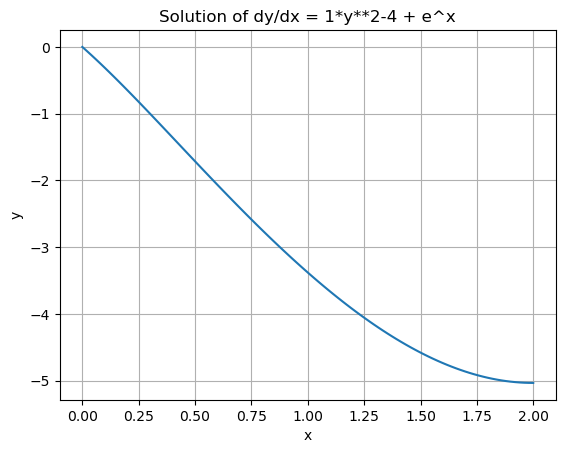

In [6]:
plt.plot(x_value, sol)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Solution of dy/dx = 1*y**2-4 + e^x')
plt.grid(True)
plt.show()

**Example # 2**

In [7]:
def dydx(y,x):
    return 3*x-2
y0 = 3

In [8]:
x_val = np.linspace(0,1,10)

In [9]:
sol = odeint(dydx, y0, x_val)

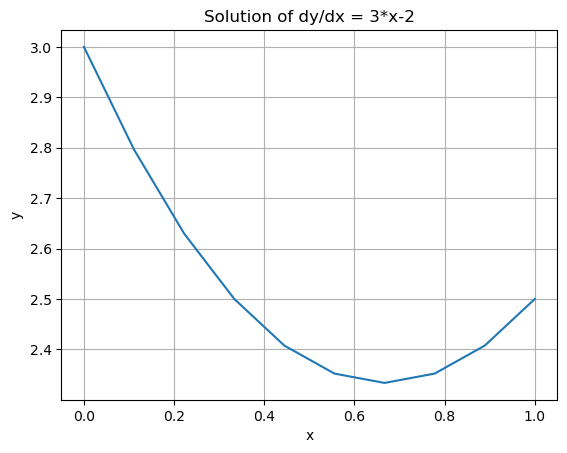

In [10]:
plt.plot(x_val, sol)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Solution of dy/dx = 3*x-2")
plt.grid(True)
plt.show()

In [11]:
sol[1]

array([2.7962963])

**Example # 3**

In [12]:
def dydx(y,x):
    return 14*x**2-11 +np.exp(x)
x0 = 0

In [13]:
y = np.linspace(1,5,100)

In [14]:
sol = odeint(dydx, x0, y)

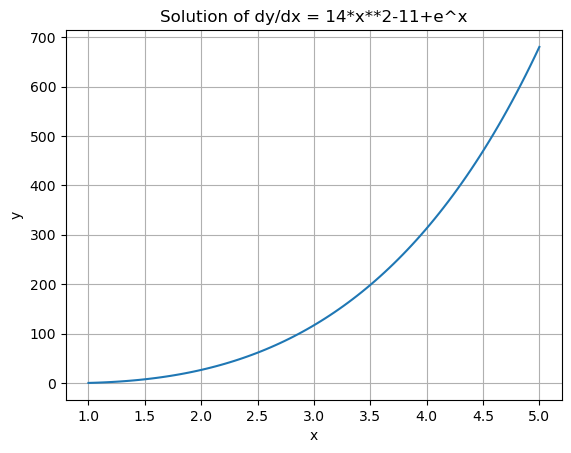

In [15]:
plt.plot(y, sol)
plt.xlabel('x')
plt.ylabel('y')
plt.title("Solution of dy/dx = 14*x**2-11+e^x")
plt.grid(True)
plt.show()

In [16]:
sol[5]

array([1.8244562])

**Solving Heat Equation PDE using Explicit Method**

In [17]:
h = 0.25
k = 0.25
x = np.arange(0, 1+h, h)
t = np.arange(0, 1+k, k)
boundryconditions = [0,0]
initialconditions = np.sin(np.pi*x)

n = len(x)
m = len(t)
T = np.zeros((n,m))
T[0,:] = boundryconditions[0]
T[-1, :] = boundryconditions[1]
T[:, 0] = initialconditions
T.round(3)

array([[0.   , 0.   , 0.   , 0.   , 0.   ],
       [0.707, 0.   , 0.   , 0.   , 0.   ],
       [1.   , 0.   , 0.   , 0.   , 0.   ],
       [0.707, 0.   , 0.   , 0.   , 0.   ],
       [0.   , 0.   , 0.   , 0.   , 0.   ]])

In [18]:
factor = k/h**2 
for j in range(1, m):
    for i in range(1, n-1):
        T[i, j] = factor*T[i-1, j-1] + (1-2*factor)*T[i, j-1] + factor*T[i+1, j-1]
T.round(3) 

array([[ 0.   ,  0.   ,  0.   ,  0.   ,  0.   ],
       [ 0.707, -0.95 ,  1.276, -1.713,  2.301],
       [ 1.   , -1.343,  1.804, -2.423,  3.255],
       [ 0.707, -0.95 ,  1.276, -1.713,  2.301],
       [ 0.   ,  0.   ,  0.   ,  0.   ,  0.   ]])

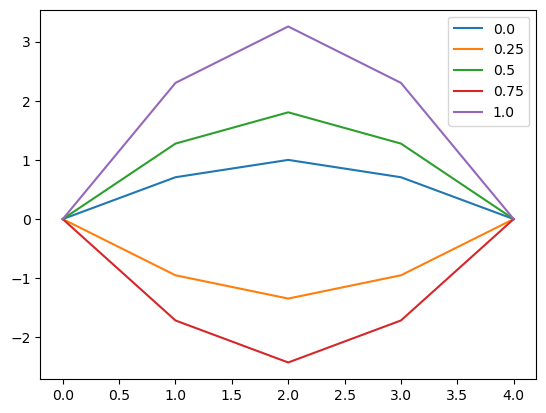

In [19]:
plt.plot(T)
plt.legend(t)

**Link Of The Whole process Of Explicit Function**

In [20]:
##https://youtu.be/NLuCx2SrxHw

## Integration in Python

**Importing Libraries**

In [21]:
import numpy as np
import scipy as sp
import sympy as smp
import matplotlib.pyplot as plt
from scipy.integrate import quad
from scipy.integrate import cumulative_trapezoid
from scipy import integrate

**Symbolic Case**

**Example:** Find $$\int sin^3(x)e^{-5x}\, dx$$

**Define Symbols In SYMPy**

In [22]:
x = smp.symbols('x', real = True)

In [23]:
smp.sin(x)**3

sin(x)**3

In [24]:
f = smp.sin(x)**3 * smp.exp(-5*x)

In [25]:
smp.sin(x)**3 * smp.exp(-5*x)

exp(-5*x)*sin(x)**3

In [26]:
smp.integrate(f, x)

-40*exp(-5*x)*sin(x)**3/221 - 21*exp(-5*x)*sin(x)**2*cos(x)/221 - 15*exp(-5*x)*sin(x)*cos(x)**2/442 - 3*exp(-5*x)*cos(x)**3/442

**Example:** Find $$\int cos(bx)e^{-ax} \ dx $$

In [27]:
a, b = smp.symbols('a, b', real = True, positive = True)

In [28]:
smp.cos(b*x)

cos(b*x)

In [29]:
smp.exp(-a*x)

exp(-a*x)

In [30]:
f = smp.cos(b*x) * smp.exp(-a*x)

In [31]:
Sol = smp.integrate(f, x)
Sol

-a*cos(b*x)/(a**2*exp(a*x) + b**2*exp(a*x)) + b*sin(b*x)/(a**2*exp(a*x) + b**2*exp(a*x))

**For Further Simplifications using Simplify Function**

In [32]:
Sol.simplify()

(-a*cos(b*x) + b*sin(b*x))*exp(-a*x)/(a**2 + b**2)

**Example:** Find $$\int \frac{(1 + \sqrt{x})^{1/3}}{\sqrt{x}} \, dx $$

In [33]:
f = (1 + smp.sqrt(x))**smp.Rational(1, 3) / smp.sqrt(x)
f

(sqrt(x) + 1)**(1/3)/sqrt(x)

In [34]:
sol = smp.integrate(f, x)
sol

3*sqrt(x)*(sqrt(x) + 1)**(1/3)/2 + 3*(sqrt(x) + 1)**(1/3)/2

In [35]:
sol.simplify()

3*(sqrt(x) + 1)**(4/3)/2

**Example:** Find Definite Integral 

$$\int_{0}^{\ln(4)} \frac{e^{x}}{\sqrt{e^{2x}+9}} \, dx$$

In [36]:
f = smp.exp(x)
f

exp(x)

In [37]:
model = f / smp.sqrt(smp.exp(2*x) + 9)
model

exp(x)/sqrt(exp(2*x) + 9)

In [38]:
sol = smp.integrate(model, (x, 0, smp.log(4)))
sol

-asinh(1/3) + asinh(4/3)

In [39]:
## USing Evaluate Float function for further solution.

In [40]:
sol.evalf()

0.771162138430851

In [41]:
model_func = smp.lambdify(x, model, "numpy")

In [42]:
x_vals = np.linspace(0, np.log(4), 400)
model_vals = model_func(x_vals)

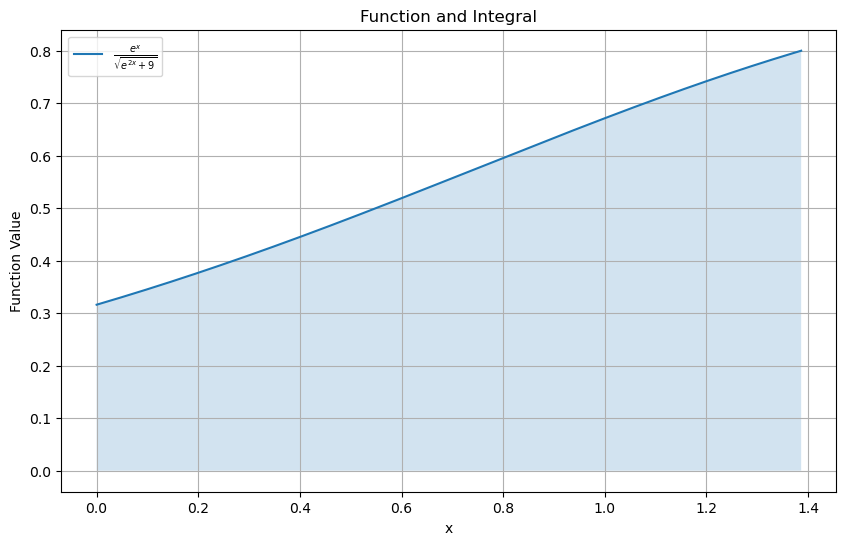

Integral result: 0.771162138430851


In [43]:
plt.figure(figsize=(10, 6))
plt.plot(x_vals, model_vals, label=r'$\frac{e^{x}}{\sqrt{e^{2x}+9}}$')
plt.fill_between(x_vals, model_vals, alpha=0.2)
plt.xlabel('x')
plt.ylabel('Function Value')
plt.title('Function and Integral')
plt.legend()
plt.grid()
plt.show()
print("Integral result:", sol.evalf())

## Mathematical Problems In Engineering

### Modified Leak Location Formulas:

$$ t_1 = \int_{0}^{x}\frac{1}{v(x)-u(x)} \, dx $$
$$ t_2 = \int_{x}^{L}\frac{1}{v(x)+u(x)} \, dx $$

In [1]:
import numpy as np
import scipy as sp
import sympy as smp
import matplotlib.pyplot as plt
from scipy.integrate import quad
from scipy.integrate import cumulative_trapezoid
from scipy import integrate

In [49]:
# Assign values to u(x) and v(x)
def u(x):
    return x**2

def v(x):
    return x + 1

u_value = 294.85  # Replace with the desired value
v_value = 378  # Replace with the desired value

# Define the integrand function
def t_1(x):
    return 1 / (v(x) - u(x))

# Define the integration limits
x_min = 0
x_max = 6 # Adjust the upper limit as needed

# Perform the numerical integration
result, error = quad(t_1, x_min, x_max)

print("Result:", round(result,4))
print(f"Estimated error:", round(error,))

Result: -0.6521
Estimated error: 0


C:\Users\adil.zubair\AppData\Local\Temp\ipykernel_1620\1247100986.py:20: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  result, error = quad(t_1, x_min, x_max)


In [76]:
def Gas_velocity(Q_b, D, P_b, T_b, Z, T, P):
    u = 14.7349*((Q_b/(D**2))*(P_b/T_b)*((Z*T)/P))
    return u

In [77]:
Q_b = 196.64
D = 0.895
P_b = 101.325
T_b = 298
P = 4371.28
T = 305.22
Z = 1


In [83]:
u = Gas_velocity(Q_b, D, P_b, T_b, Z, T, P)

In [84]:
print("u =", u)

u = 85.87716484896022
